<a href="https://colab.research.google.com/github/imanjanoo2001/info498I/blob/main/Neutral_Account_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Load the CSV file into a pandas DataFrame
file_name = list(uploaded.keys())[0]

# Try different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        data = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to load with encoding: {encoding}, error: {e}")

# Display the first few rows of the DataFrame
print(data.head())


Saving neutral_posts.csv to neutral_posts (2).csv
Successfully loaded with encoding: utf-8
       media_ID  comment_count  like_count  \
0  3.370240e+18            542       26265   
1  3.370640e+18              4         986   
2  3.369210e+18             41          -1   
3  3.369530e+18             31        4227   
4  3.362370e+18            883       71032   

                                        caption_text  
0  University of Ghent in Belgium divests and cut...  
1  Indigenous knowledge is how we must move forwa...  
2  There is nothing greater than Jewish Joy.  And...  
3  4 rolls of film later 🎞️ 🇵🇰 ✈️ \n\n#minolta #f...  
4  From #ThePierreHotel to the #MetGala, #Shakira...  


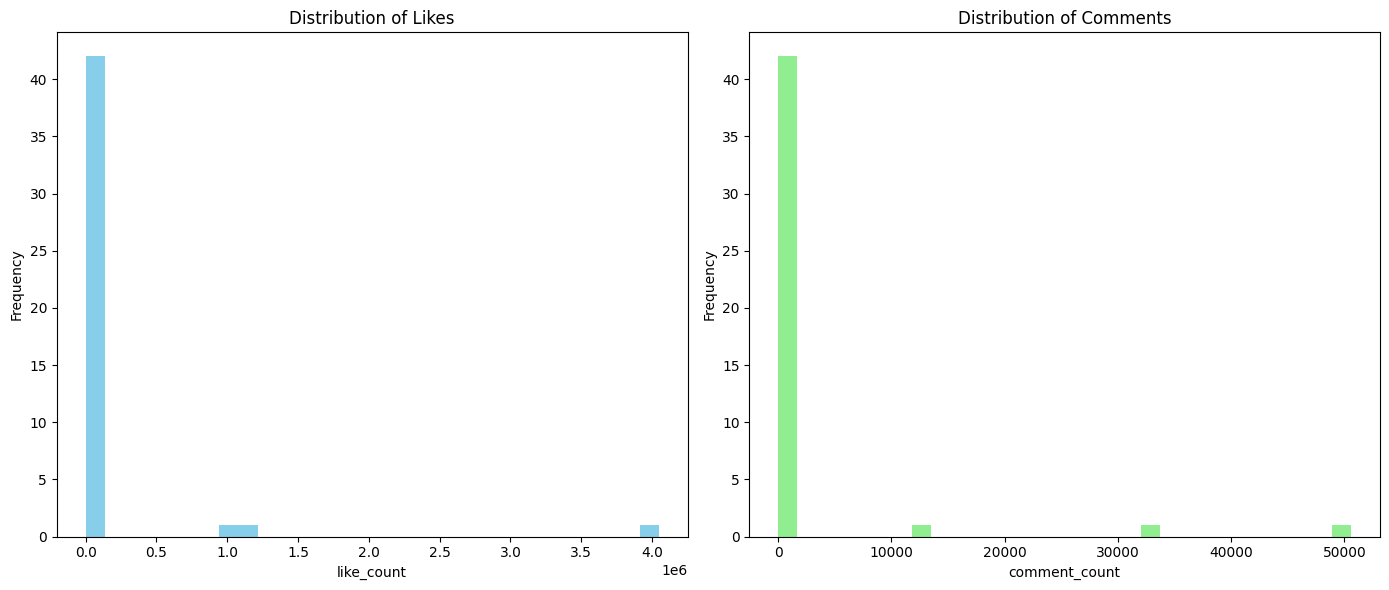

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for Like Count and Comment Count
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['like_count'], bins=30, color='skyblue')
plt.title('Distribution of Likes')
plt.xlabel('like_count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['comment_count'], bins=30, color='lightgreen')
plt.title('Distribution of Comments')
plt.xlabel('comment_count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

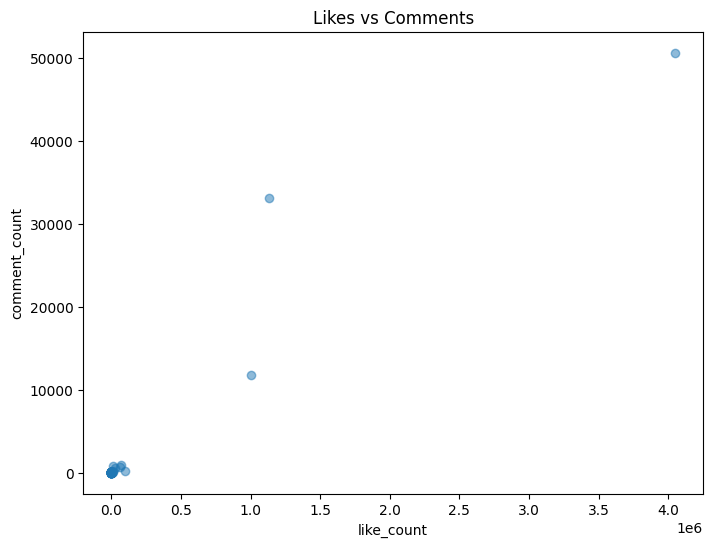

In [10]:
# Scatter plot of Like Count vs Comment Count
plt.figure(figsize=(8, 6))
plt.scatter(data['like_count'], data['comment_count'], alpha=0.5)
plt.title('Likes vs Comments')
plt.xlabel('like_count')
plt.ylabel('comment_count')
plt.show()

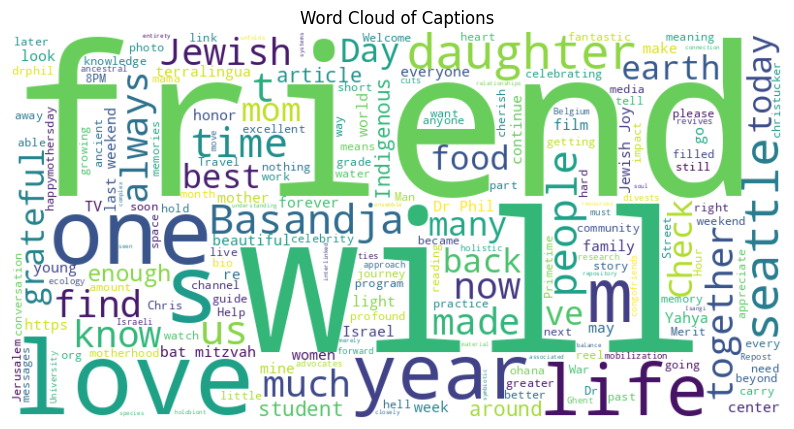

In [12]:
from wordcloud import WordCloud

# Combine all captions into a single string
text = ' '.join(data['caption_text'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions')
plt.show()

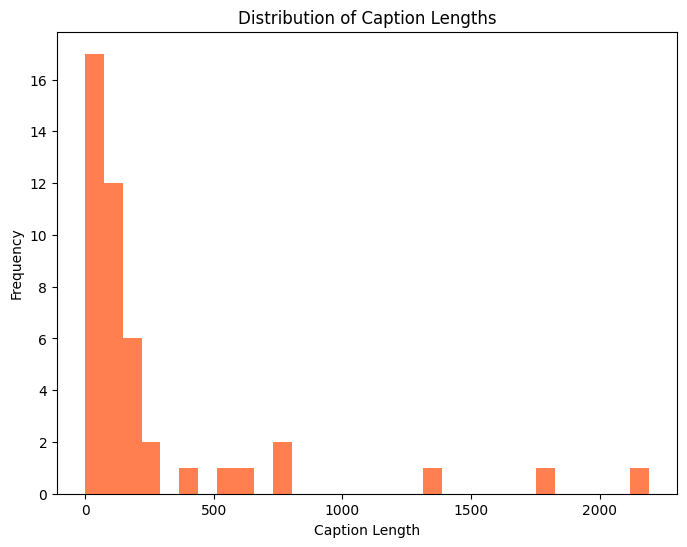

In [14]:
# Add a new column for caption length
data['Caption Length'] = data['caption_text'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Plot the distribution of caption lengths
plt.figure(figsize=(8, 6))
plt.hist(data['Caption Length'], bins=30, color='coral')
plt.title('Distribution of Caption Lengths')
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.show()